In [14]:
import torch

sample_size = 0.01
use_sample = False
device = "cuda" if torch.cuda.is_available() else "cpu"
onnx_path = "autoencoder.onnx"

trained_model_path = "best_models/04_best_model_proposed.pth"
existing_model_architecture = {
    "input_dim": 122,
    "hidden_dims": [96, 72, 48, 32],
    "latent_dim": 16,
    "activation_type": "LeakyReLU",
    "output_activation_type": "Sigmoid",
}

train_autoencoder_new = False

new_model_architecture = {
    "hidden_dims": [96, 64],
    "latent_dim": 55,
    "activation_type": "LeakyReLU",
    "output_activation_type": "Sigmoid",
}

new_model_learning_parameters = {
    "batch_size": 64,
    "learning_rate": 1e-3,
    "num_epochs": 100,
    "improvement_threshold": 0.000000001,
    "good_model_threshold": 0.00015,
    "early_stopping_patience": 10,
}

train_set_path = "../datasets/train_set_full.csv"
test_set_path = "../datasets/test_set.csv"

In [15]:
dbscan_parameters = {
    "eps": 1.8613647546647174,
    "min_samples": 17,
    "distance_metric": "manhattan",
    "score": 0.4514608383178711,
}

tree_alogrithm_parameter = "kd_tree"

dbocsvm_parameter_list = {
    0: {"kernel": "rbf", "gamma": 0.3778689246760989, "nu": 0.010085393635998507},
    1: {"kernel": "rbf", "gamma": 0.11591342565009682, "nu": 0.3440419651061539},
    2: {"kernel": "rbf", "gamma": 0.5314954625561367, "nu": 0.026439051327779364},
    3: {"kernel": "rbf", "gamma": 0.08309204799542479, "nu": 0.024312123995918426},
    4: {"kernel": "rbf", "gamma": 0.5550233073574176, "nu": 0.4551654955778567},
    5: {"kernel": "rbf", "gamma": 0.6414796055315016, "nu": 0.050701299206116934},
    6: {"kernel": "rbf", "gamma": 0.0008986339514556463, "nu": 0.24514913182561993},
    7: {"kernel": "rbf", "gamma": 0.757662532102209, "nu": 0.2501064103312327},
    8: {"kernel": "rbf", "gamma": 0.7333581969818428, "nu": 0.26020086174774204},
    9: {"kernel": "rbf", "gamma": 0.10496822272999015, "nu": 0.02852456888357604},
    10: {"kernel": "rbf", "gamma": 0.9656961664424355, "nu": 0.26627830030264144},
    11: {"kernel": "rbf", "gamma": 0.4092458506871375, "nu": 0.1894731295635334},
    12: {"kernel": "rbf", "gamma": 0.6917762848174095, "nu": 0.25268693436186845},
    13: {"kernel": "rbf", "gamma": 0.48043248469708844, "nu": 0.10417970848063958},
    14: {"kernel": "rbf", "gamma": 0.6386076737007909, "nu": 0.4829750586859596},
    15: {"kernel": "rbf", "gamma": 0.049747796382057174, "nu": 0.2399143884217243},
    16: {"kernel": "rbf", "gamma": 0.02634561133577234, "nu": 0.1520870298589021},
    17: {"kernel": "rbf", "gamma": 0.768120305339925, "nu": 0.41953537556047665},
    18: {"kernel": "rbf", "gamma": 0.5764697773141549, "nu": 0.35141943023038497},
    19: {"kernel": "rbf", "gamma": 0.16517913900561293, "nu": 0.33045277094769904},
    20: {"kernel": "rbf", "gamma": 0.7804563657118683, "nu": 0.1943617923885456},
    21: {"kernel": "rbf", "gamma": 0.1670141906398417, "nu": 0.30398373427211756},
    22: {"kernel": "rbf", "gamma": 0.5238167962170893, "nu": 0.46042750293831924},
    23: {"kernel": "rbf", "gamma": 0.00010516125298489632, "nu": 0.025344459253073482},
    24: {"kernel": "rbf", "gamma": 0.13481896137567762, "nu": 0.4514649950376076},
    25: {"kernel": "rbf", "gamma": 0.4283090407701687, "nu": 0.25063600289401144},
    26: {"kernel": "rbf", "gamma": 0.37692448095864667, "nu": 0.21073338408883635},
    27: {"kernel": "rbf", "gamma": 0.6399435266973421, "nu": 0.22401429241294496},
    28: {"kernel": "rbf", "gamma": 0.33809737638685106, "nu": 0.3018139373854418},
    29: {"kernel": "rbf", "gamma": 0.7941437138154611, "nu": 0.3627894528991485},
    30: {"kernel": "rbf", "gamma": 0.47356415778532607, "nu": 0.07126914902191016},
    31: {"kernel": "rbf", "gamma": 0.6449631206898767, "nu": 0.3727590391762971},
    32: {"kernel": "rbf", "gamma": 0.15371570626303496, "nu": 0.14287770499162894},
    33: {"kernel": "rbf", "gamma": 0.732016537564395, "nu": 0.3027852977102496},
    34: {"kernel": "rbf", "gamma": 0.09789947800340003, "nu": 0.04874950315205668},
    35: {"kernel": "rbf", "gamma": 0.07790629593108842, "nu": 0.4090572421208537},
    36: {"kernel": "rbf", "gamma": 0.8494811939995459, "nu": 0.47149271505560414},
    37: {"kernel": "rbf", "gamma": 0.3326291618570131, "nu": 0.3228646314355047},
    38: {"kernel": "rbf", "gamma": 0.0288131763616729, "nu": 0.3782318755546086},
    39: {"kernel": "rbf", "gamma": 0.8169526569046146, "nu": 0.034253509258045114},
    40: {"kernel": "rbf", "gamma": 0.09944437725954697, "nu": 0.029793283213527155},
    41: {"kernel": "rbf", "gamma": 0.7448070867035392, "nu": 0.35914158948102914},
    42: {"kernel": "rbf", "gamma": 0.5526264618914039, "nu": 0.13022242282020902},
    43: {"kernel": "rbf", "gamma": 0.7528040164609279, "nu": 0.32022711790399055},
    44: {"kernel": "rbf", "gamma": 0.9467973916627881, "nu": 0.4444080501754087},
    45: {"kernel": "rbf", "gamma": 0.9605959336614542, "nu": 0.39853702076673125},
    46: {"kernel": "rbf", "gamma": 0.11130122231715917, "nu": 0.028475046011398053},
    47: {"kernel": "rbf", "gamma": 0.5102349303694419, "nu": 0.21894462621542957},
    48: {"kernel": "rbf", "gamma": 0.5902854499800099, "nu": 0.19603720411619827},
    49: {"kernel": "rbf", "gamma": 0.8614480699567701, "nu": 0.3368661853842364},
}

import dataset

In [16]:
import pandas as pd

train_df = pd.read_csv(train_set_path)
if use_sample:
    train_df = train_df.sample(frac=sample_size, random_state=42).reset_index(drop=True)

print(train_df.shape)
train_df.head(1)

(67342, 122)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.057999e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
X_train_full = train_df.values

print(X_train_full.shape)

(67342, 122)


In [18]:
import torch
from torch.utils.data import TensorDataset

# Convert to PyTorch tensors
X_train_full_tensor = torch.FloatTensor(X_train_full)

# Create data loaders
X_train_full_dataset = TensorDataset(X_train_full_tensor)

input_dim = X_train_full.shape[1]

train an autoencoder if not existing autoencoder

In [19]:
from models import BatchNormAutoencoder
from torch import nn, optim

if train_autoencoder_new:
    autoencoder = BatchNormAutoencoder(
        input_dim=input_dim,
        hidden_dims=new_model_architecture["hidden_dims"],
        latent_dim=new_model_architecture["latent_dim"],
        activation_type=new_model_architecture["activation_type"],
        output_activation_type=new_model_architecture["output_activation_type"],
    )

    optimizer = optim.Adam(
        autoencoder.parameters(), lr=new_model_learning_parameters["learning_rate"]
    )
    criterion = nn.MSELoss()

In [20]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

if train_autoencoder_new:
    X_train, X_val = train_test_split(train_df, test_size=0.2, random_state=42)
    X_train = X_train.values
    X_val = X_val.values

    print(X_train.shape, X_val.shape, X_train_full.shape)

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train)
    X_val_tensor = torch.FloatTensor(X_val)

    # Create data loaders
    train_dataset = TensorDataset(X_train_tensor)
    val_dataset = TensorDataset(X_val_tensor)

    input_dim = X_train.shape[1]

    train_loader = DataLoader(
        train_dataset,
        batch_size=new_model_learning_parameters["batch_size"],
        shuffle=True,
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=new_model_learning_parameters["batch_size"],
        shuffle=False,
    )

In [21]:
from utils import train_autoencoder


if train_autoencoder_new:
    new_best_model_path = "best_models/new_model.pth"

    history, is_good_model = train_autoencoder(
        model=autoencoder,
        train_loader=train_loader,
        val_loader=val_loader,
        optimizer=optimizer,
        criterion=criterion,
        epochs=new_model_learning_parameters["num_epochs"],
        best_model_path=new_best_model_path,
        verbose=True,
        early_stopping_patience=new_model_learning_parameters[
            "early_stopping_patience"
        ],
        improvement_threshold=new_model_learning_parameters["improvement_threshold"],
        good_model_threshold=new_model_learning_parameters["good_model_threshold"],
        plot_results=True,
    )

load trained autoencoder

In [ ]:
from final_models import BatchNormAutoencoder

if not train_autoencoder_new:
    autoencoder = BatchNormAutoencoder(
        input_dim=existing_model_architecture["input_dim"],
        hidden_dims=existing_model_architecture["hidden_dims"],
        latent_dim=existing_model_architecture["latent_dim"],
        activation_type=existing_model_architecture["activation_type"],
        output_activation_type=existing_model_architecture["output_activation_type"],
    )

In [23]:
# Load best model
if train_autoencoder_new:
    checkpoint = torch.load(new_best_model_path)
    autoencoder.load_state_dict(checkpoint["model_state_dict"])
else:
    checkpoint = torch.load(trained_model_path)
    autoencoder.load_state_dict(checkpoint["model_state_dict"])

autoencoder.eval()

BatchNormAutoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=122, out_features=96, bias=True)
    (1): BatchNorm1d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Linear(in_features=96, out_features=72, bias=True)
    (4): BatchNorm1d(72, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=72, out_features=48, bias=True)
    (7): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.01)
    (9): Linear(in_features=48, out_features=32, bias=True)
    (10): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): LeakyReLU(negative_slope=0.01)
    (12): Linear(in_features=32, out_features=16, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=16, out_features=32, bias=True)
    (1): BatchNorm1d(32, eps=1e-05, momentum

import test set

In [24]:
test_df = pd.read_csv(test_set_path)
print(test_df.shape)
test_df.head(1)

(22543, 125)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_binary,attack_categorical,attack_class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,neptune,DoS


In [25]:
# Splitting into X and y
X_test = test_df.drop(
    columns=["attack_binary", "attack_categorical", "attack_class"]
).values
y_test = test_df["attack_binary"].values
y_test_class = test_df["attack_class"]

In [ ]:
import shap
import numpy as np

# Create a wrapper function for the autoencoder that returns reconstruction error
class AutoencoderWrapper:
    def __init__(self, autoencoder):
        self.autoencoder = autoencoder
        
    def __call__(self, X):
        # Convert to tensor
        X_tensor = torch.FloatTensor(X).to(device)
        
        # Get reconstruction
        with torch.no_grad():
            reconstructed = self.autoencoder(X_tensor)
            
        # Calculate reconstruction error per sample
        reconstruction_error = ((reconstructed - X_tensor) ** 2).mean(dim=1).cpu().numpy()
        return reconstruction_error

# Initialize the wrapper
model_wrapper = AutoencoderWrapper(autoencoder)

# Create a background dataset (subset of training data)
# background_data = X_train_full[:1000]  # Using a subset for computational efficiency
background_data = shap.kmeans(X_train_full, 100)  # Use 100 representative centroids

# Initialize SHAP explainer
explainer = shap.KernelExplainer(model_wrapper, background_data)

# Sample a subset of test data for SHAP analysis (for efficiency)
test_sample_indices = np.random.choice(len(X_test), min(500, len(X_test)), replace=False)
test_sample = X_test[test_sample_indices]

# Calculate SHAP values
shap_values = explainer.shap_values(test_sample)

Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/500 [00:00<?, ?it/s]

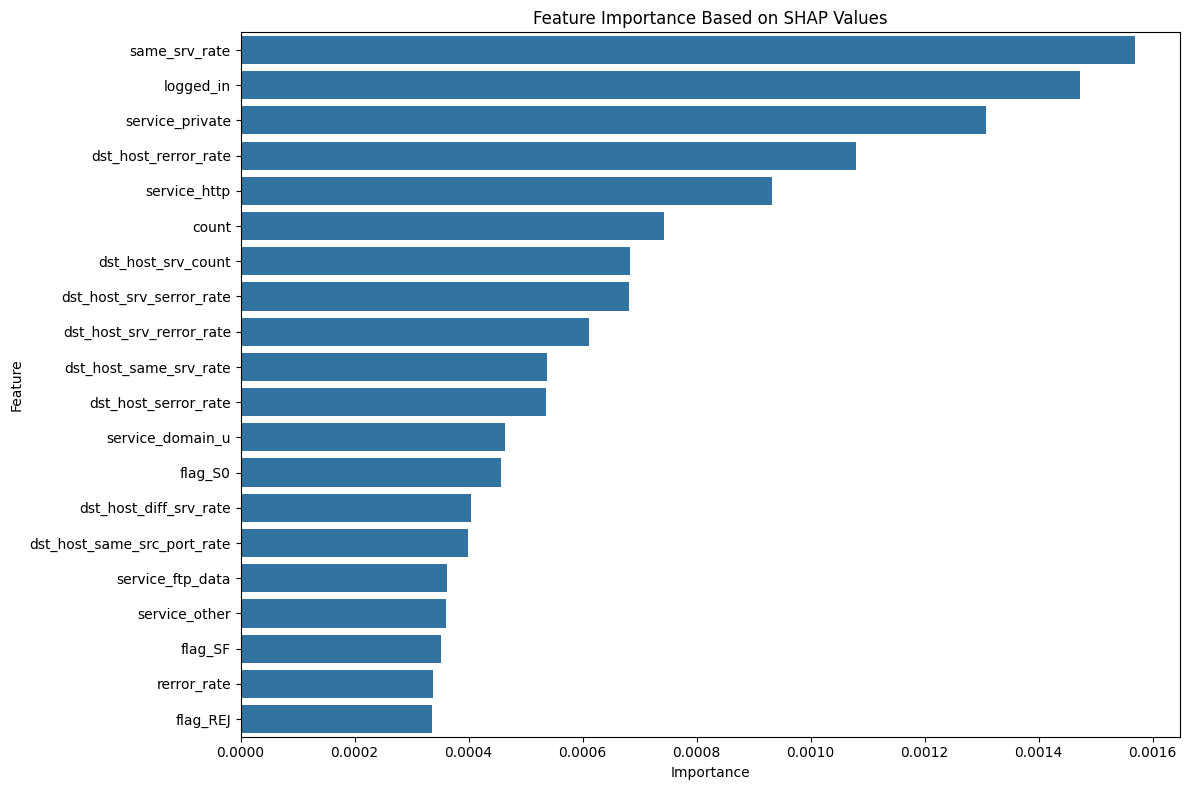

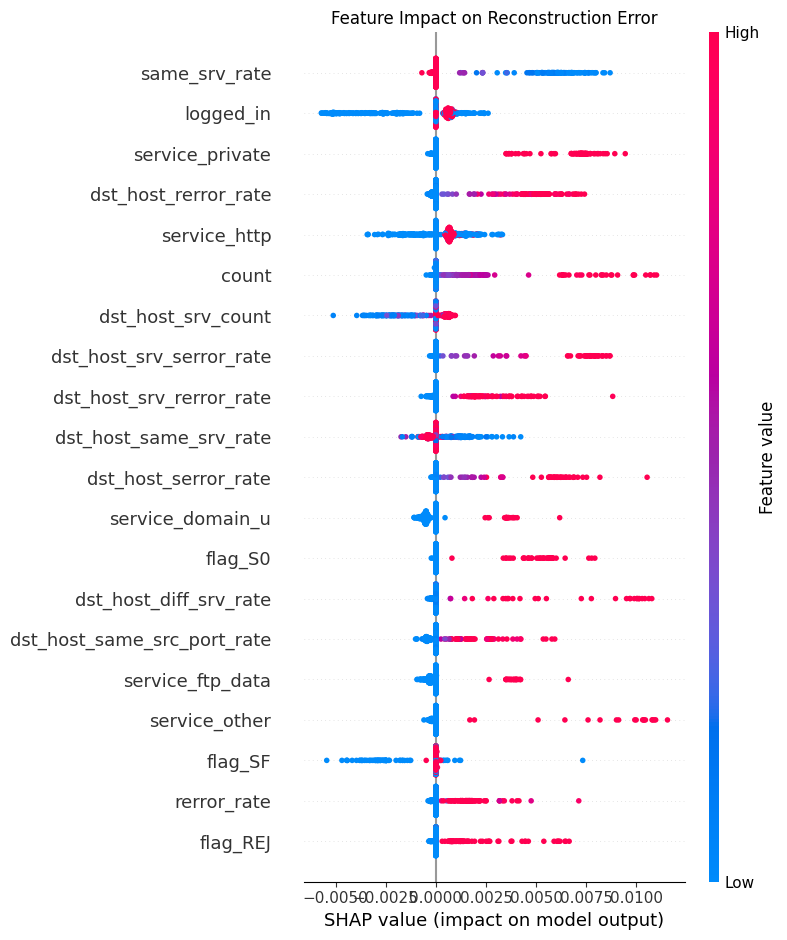

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert test_sample to DataFrame with feature names
feature_names = test_df.drop(columns=["attack_binary", "attack_categorical", "attack_class"]).columns
test_sample_df = pd.DataFrame(test_sample, columns=feature_names)

# Alternative approach for SHAP feature importance visualization
plt.figure(figsize=(12, 8))

# Calculate mean absolute SHAP values for each feature
feature_importance = np.abs(shap_values).mean(0)
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)

# Take top 20 features
top_features = feature_importance_df.head(20)

# Create standard matplotlib bar plot
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title("Feature Importance Based on SHAP Values")
plt.tight_layout()
plt.savefig('shap_feature_importance_alt.png', bbox_inches='tight', dpi=300)
plt.show()

# The second plot might work with the direct SHAP approach
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values, test_sample_df, max_display=20, show=False)
plt.title("Feature Impact on Reconstruction Error")
plt.tight_layout()
plt.savefig('shap_feature_impact.png', bbox_inches='tight', dpi=300)
plt.show()

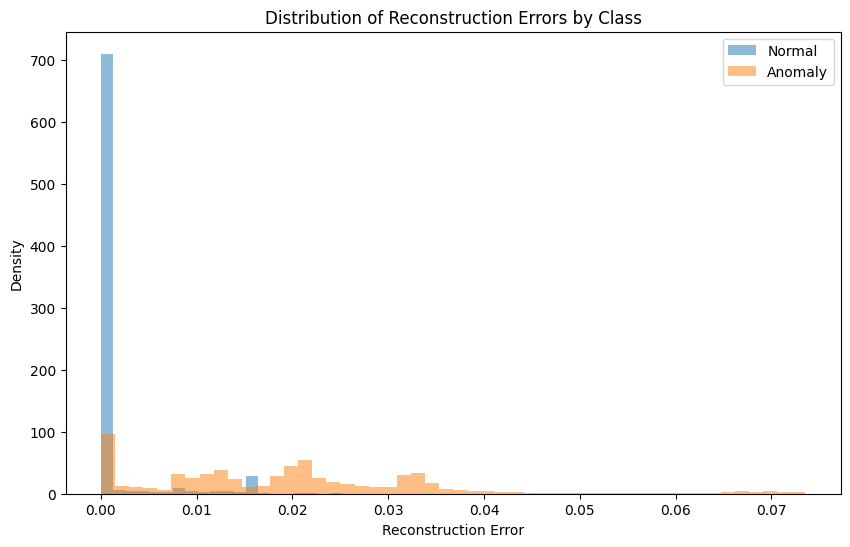

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


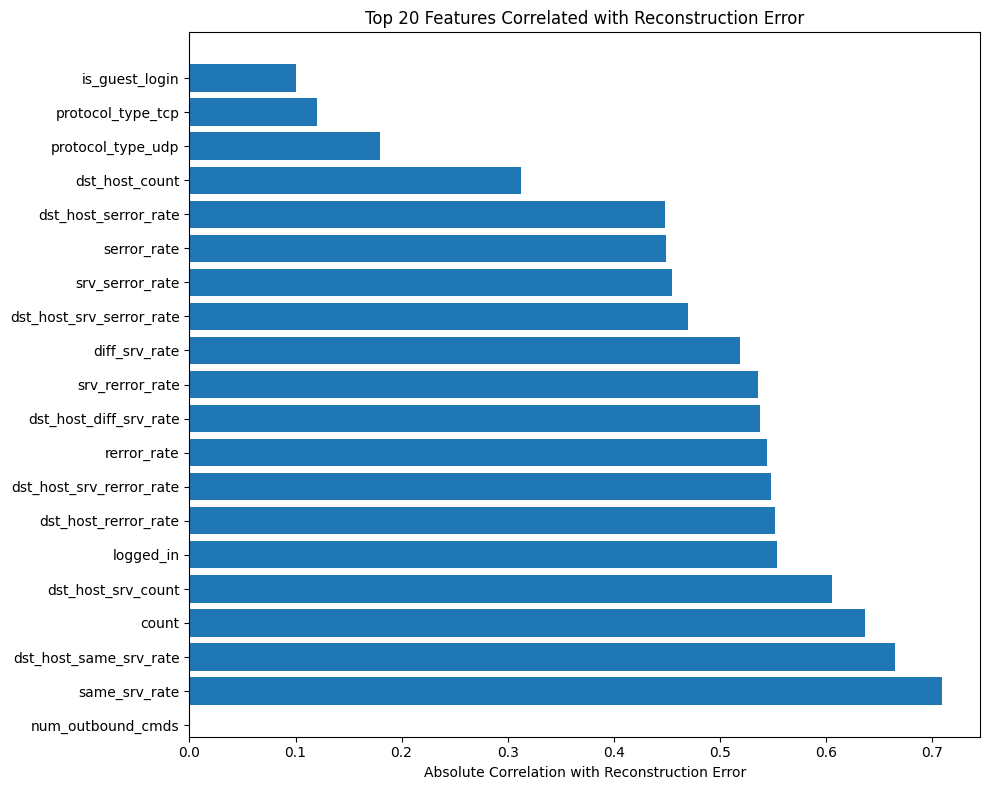

In [29]:
# Calculate reconstruction errors for all test data
def calculate_reconstruction_errors(data, model):
    errors = []
    batch_size = 256
    data_tensor = torch.FloatTensor(data).to(device)
    dataset = TensorDataset(data_tensor)
    loader = DataLoader(dataset, batch_size=batch_size)
    
    with torch.no_grad():
        for batch in loader:
            inputs = batch[0]
            outputs = model(inputs)
            error = ((outputs - inputs) ** 2).mean(dim=1)
            errors.append(error.cpu().numpy())
    
    return np.concatenate(errors)

# Get reconstruction errors for test data
test_errors = calculate_reconstruction_errors(X_test, autoencoder)

# Plot distribution of reconstruction errors by class
plt.figure(figsize=(10, 6))
plt.hist(test_errors[y_test == 1], bins=50, alpha=0.5, label='Normal', density=True)
plt.hist(test_errors[y_test == -1], bins=50, alpha=0.5, label='Anomaly', density=True)
plt.legend()
plt.xlabel('Reconstruction Error')
plt.ylabel('Density')
plt.title('Distribution of Reconstruction Errors by Class')
plt.show()

# Calculate correlations between feature values and reconstruction error
feature_names = test_df.drop(columns=["attack_binary", "attack_categorical", "attack_class"]).columns
correlations = []

for i in range(X_test.shape[1]):
    corr = np.corrcoef(X_test[:, i], test_errors)[0, 1]
    correlations.append((feature_names[i], abs(corr)))

# Sort by correlation strength
correlations.sort(key=lambda x: x[1], reverse=True)

# Plot top 20 correlations
plt.figure(figsize=(10, 8))
top_features = [x[0] for x in correlations[:20]]
top_correlations = [x[1] for x in correlations[:20]]
plt.barh(top_features, top_correlations)
plt.xlabel('Absolute Correlation with Reconstruction Error')
plt.title('Top 20 Features Correlated with Reconstruction Error')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

# Print top 10 most important features according to SHAP
feature_importance = np.abs(shap_values).mean(0)
feature_importance_dict = {feature_names[i]: feature_importance[i] for i in range(len(feature_names))}
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("Top 10 most important features according to SHAP analysis:")
for feature, importance in sorted_features[:10]:
    print(f"{feature}: {importance:.6f}")

# Compare with correlation analysis
print("\nTop 10 features most correlated with reconstruction error:")
for feature, correlation in correlations[:10]:
    print(f"{feature}: {correlation:.6f}")
    
# Calculate how many anomalies could be detected by reconstruction error alone
# using a simple threshold-based approach

# Find optimal threshold
precision, recall, thresholds = precision_recall_curve(y_test == -1, test_errors)
f1_scores = 2 * precision * recall / (precision + recall + 1e-10)
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Apply threshold
predicted_anomalies = test_errors > optimal_threshold

# Calculate metrics
accuracy = np.mean(predicted_anomalies == (y_test == -1))
precision = np.sum(predicted_anomalies & (y_test == -1)) / (np.sum(predicted_anomalies) + 1e-10)
recall = np.sum(predicted_anomalies & (y_test == -1)) / (np.sum(y_test == -1) + 1e-10)
f1 = 2 * precision * recall / (precision + recall + 1e-10)

print(f"\nUsing only reconstruction error for anomaly detection:")
print(f"Optimal threshold: {optimal_threshold:.6f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nCompared to the hybrid DBOCSVM model performance above, we can see how the clustering and")
print("multiple One-Class SVM approach enhances detection compared to using reconstruction error alone.")

Top 10 most important features according to SHAP analysis:
same_srv_rate: 0.001570
logged_in: 0.001473
service_private: 0.001307
dst_host_rerror_rate: 0.001080
service_http: 0.000932
count: 0.000743
dst_host_srv_count: 0.000683
dst_host_srv_serror_rate: 0.000681
dst_host_srv_rerror_rate: 0.000611
dst_host_same_srv_rate: 0.000538

Top 10 features most correlated with reconstruction error:
num_outbound_cmds: nan
same_srv_rate: 0.710052
dst_host_same_srv_rate: 0.665742
count: 0.636785
dst_host_srv_count: 0.605965
logged_in: 0.554258
dst_host_rerror_rate: 0.551856
dst_host_srv_rerror_rate: 0.548272
rerror_rate: 0.544762
dst_host_diff_srv_rate: 0.538356

Using only reconstruction error for anomaly detection:
Optimal threshold: 0.000400
Accuracy: 0.8901
Precision: 0.9014
Recall: 0.9060
F1 Score: 0.9037

Compared to the hybrid DBOCSVM model performance above, we can see how the clustering and
multiple One-Class SVM approach enhances detection compared to using reconstruction error alone.


Training the DBOCSVM

In [ ]:
from torch.utils.data import DataLoader

# extract encoded features
X_train_full_loader = DataLoader(X_train_full_dataset, batch_size=256)

# Extract in batches to prevent memory issues
X_train_full_encoded = []
with torch.no_grad():
    for data in X_train_full_loader:
        data_x = data[0].to(device)
        encoded = autoencoder.encode(data_x)
        X_train_full_encoded.append(encoded.cpu().numpy())
X_train_full_encoded = np.vstack(X_train_full_encoded)

In [ ]:
from final_models import DBOCSVM

dbocsvm = DBOCSVM(
    kernel="rbf",
    gamma="auto",
    nu=0.2,
    eps=dbscan_parameters["eps"],
    min_samples=dbscan_parameters["min_samples"],
    dbscan_distance_metric=dbscan_parameters["distance_metric"],
    tree_algorithm=tree_alogrithm_parameter,
)

In [34]:
dbocsvm.fit_cluster(X_train_full_encoded, verbose=True)

Fitting DBSCAN...


DBSCAN Fitted...
Unique Clusters: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49]
Cluster Sizes: {-1: 1048, 0: 34853, 1: 1194, 2: 602, 3: 8980, 4: 631, 5: 2755, 6: 677, 7: 4855, 8: 3772, 9: 592, 10: 2586, 11: 78, 12: 337, 13: 458, 14: 809, 15: 143, 16: 142, 17: 31, 18: 58, 19: 128, 20: 256, 21: 65, 22: 238, 23: 374, 24: 219, 25: 296, 26: 39, 27: 52, 28: 40, 29: 51, 30: 224, 31: 140, 32: 60, 33: 34, 34: 19, 35: 27, 36: 39, 37: 43, 38: 17, 39: 58, 40: 41, 41: 55, 42: 48, 43: 48, 44: 31, 45: 19, 46: 22, 47: 24, 48: 17, 49: 17}


In [35]:
dbocsvm.fit_ocsvm(X_train_full_encoded, parameter_list=dbocsvm_parameter_list)

prediction on the model

In [36]:
X_test_tensor = torch.FloatTensor(X_test).to(device)
X_test_encoded = []

test_dataset = TensorDataset(X_test_tensor, torch.zeros(len(X_test_tensor)))
test_loader = DataLoader(test_dataset, batch_size=128)

with torch.no_grad():
    for data, _ in test_loader:
        encoded = autoencoder.encode(data)
        X_test_encoded.append(encoded.cpu().numpy())

X_test_encoded = np.vstack(X_test_encoded)
print(X_test_encoded.shape)

(22543, 16)


In [37]:
y_pred = dbocsvm.predict(X_test_encoded)

evaluating the model

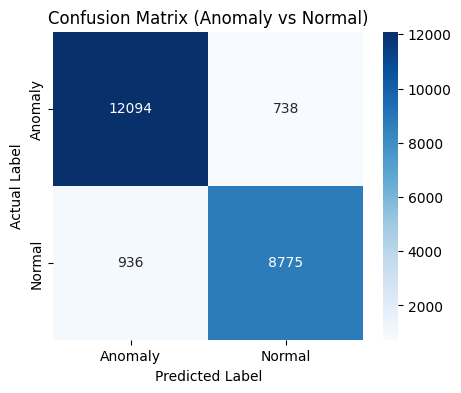

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels=[-1, 1])


def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels
    )
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(title)
    plt.show()


plot_confusion_matrix(cm, ["Anomaly", "Normal"], "Confusion Matrix (Anomaly vs Normal)")

In [39]:
from sklearn.metrics import (
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Anomaly", "Normal"]))

precision = precision_score(y_test, y_pred, pos_label=-1)
recall = recall_score(y_test, y_pred, pos_label=-1)
f1 = f1_score(y_test, y_pred, pos_label=-1)
acc = accuracy_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {acc}")

Classification Report:
              precision    recall  f1-score   support

     Anomaly       0.93      0.94      0.94     12832
      Normal       0.92      0.90      0.91      9711

    accuracy                           0.93     22543
   macro avg       0.93      0.92      0.92     22543
weighted avg       0.93      0.93      0.93     22543

Precision: 0.928165771297007
Recall: 0.9424875311720698
F1 Score: 0.9352718273915398
Accuracy: 0.9257419154504725


In [40]:
precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

print(f"Precision: {precision_1}")
print(f"Recall: {recall_1}")
print(f"F1 Score: {f1_1}")

Precision: 0.9224219489120151
Recall: 0.9036144578313253
F1 Score: 0.9129213483146067


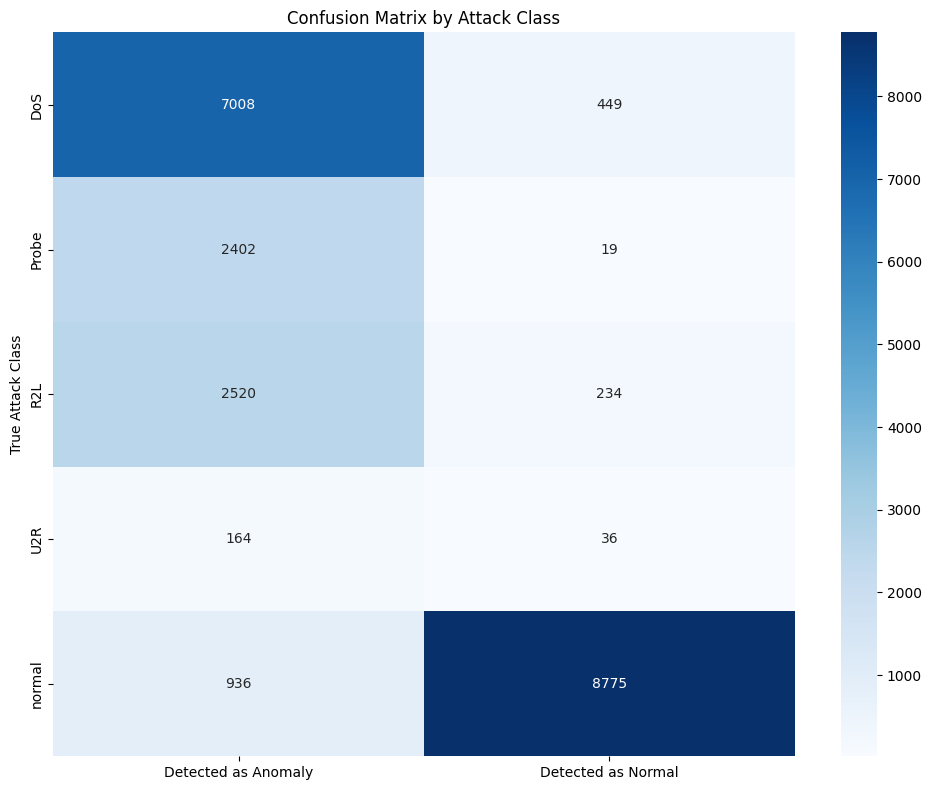

In [41]:
def create_multiclass_cm(y_true_class, y_pred_binary):
    """
    Create a confusion matrix showing how each attack class was classified.

    For attack classes (DoS, Probe, R2L, U2R), correct detection is when y_pred = -1 (anomaly)
    For normal class, correct detection is when y_pred = 1 (normal)
    """
    classes = np.unique(y_true_class)
    cm = np.zeros((len(classes), 2))

    for i, cls in enumerate(classes):
        # Get predictions for this class
        cls_indices = y_true_class == cls
        preds = y_pred_binary[cls_indices]

        # Count correct and incorrect predictions
        if cls == "normal":
            cm[i, 0] = np.sum(preds == -1)  # incorrectly detected as anomaly
            cm[i, 1] = np.sum(preds == 1)  # correctly detected as normal
        else:
            cm[i, 0] = np.sum(preds == -1)  # correctly detected as anomaly
            cm[i, 1] = np.sum(preds == 1)  # incorrectly detected as normal

    return cm, classes


# Create and plot the multi-class confusion matrix
cm_multi, classes = create_multiclass_cm(y_test_class, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_multi,
    annot=True,
    fmt="g",
    cmap="Blues",
    xticklabels=["Detected as Anomaly", "Detected as Normal"],
    yticklabels=classes,
)
plt.ylabel("True Attack Class")
plt.title("Confusion Matrix by Attack Class")
plt.tight_layout()
plt.show()

In [42]:
# Calculate detection rates for each class
print("Detection rates by class:")
class_metrics = {}
for cls in np.unique(y_test_class):
    # Get indices for this class
    class_indices = y_test_class == cls

    # True values and predictions for this class
    y_true_cls = y_test[class_indices]
    y_pred_cls = y_pred[class_indices]

    # Calculate metrics
    if cls == "Normal":
        # For normal class, we want to detect 1 (normal)
        correct = np.sum((y_pred_cls == 1))
        precision = precision_score(
            y_true_cls, y_pred_cls, pos_label=1, zero_division=0
        )
        recall = recall_score(y_true_cls, y_pred_cls, pos_label=1, zero_division=0)
    else:
        # For attack classes, we want to detect -1 (anomaly)
        correct = np.sum((y_pred_cls == -1))
        precision = precision_score(
            y_true_cls, y_pred_cls, pos_label=-1, zero_division=0
        )
        recall = recall_score(y_true_cls, y_pred_cls, pos_label=-1, zero_division=0)

    total = len(y_pred_cls)
    detection_rate = correct / total
    f1 = f1_score(
        y_true_cls, y_pred_cls, pos_label=-1 if cls != "Normal" else 1, zero_division=0
    )

    class_metrics[cls] = {
        "detection_rate": detection_rate,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "count": total,
        "correctly_detected": correct,
    }

    print(f"{cls}: {detection_rate:.4f} ({correct}/{total})")

Detection rates by class:
DoS: 0.9398 (7008/7457)
Probe: 0.9922 (2402/2421)
R2L: 0.9150 (2520/2754)
U2R: 0.8200 (164/200)
normal: 0.0964 (936/9711)
